In [14]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [15]:
# Load the dataset
data = pd.read_csv(r'C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\13 KNN\Zoo.csv')

In [16]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


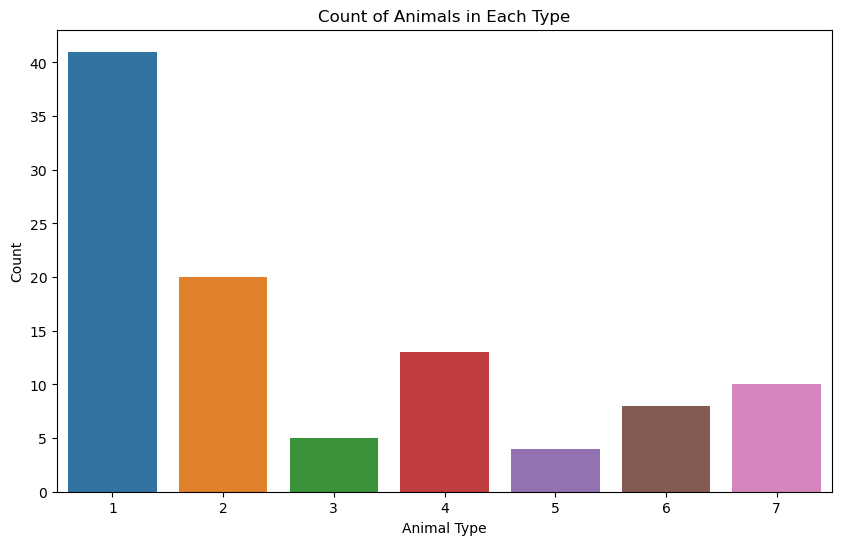

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data)
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.title('Count of Animals in Each Type')
plt.show()

#  Bar chart helps us understand the distribution of different animal types in the dataset.

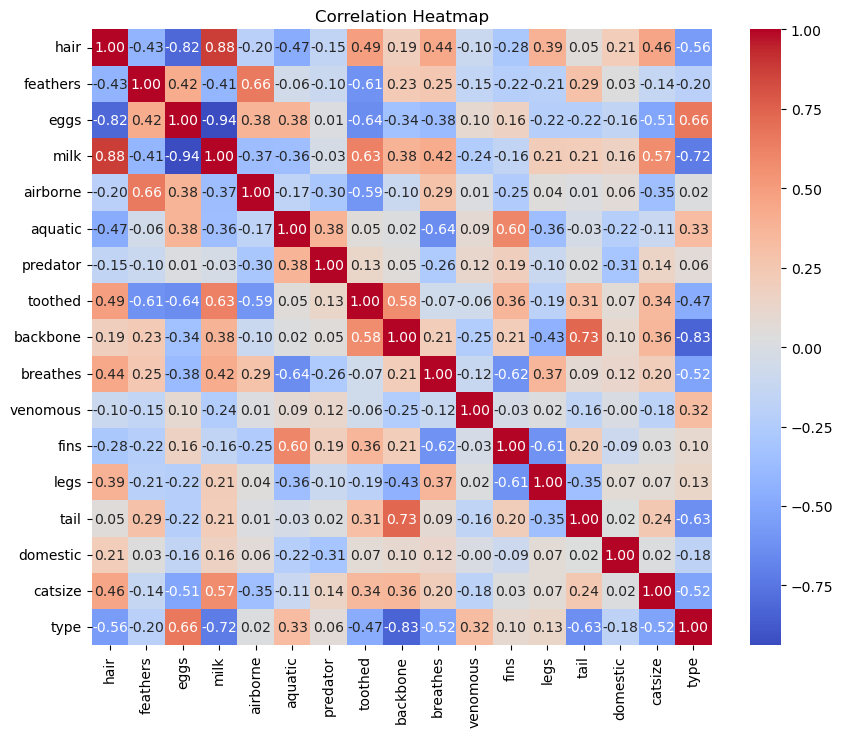

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Heat map helps us to visualize the relationships between different features. It helps us understand which features are highly correlated for eg. from the data we can say that those animals who give eggs dont give milk or vice versa, OR those animals in the zoo who have backbones has a tail also OR those who are aquatic will have fins etc.

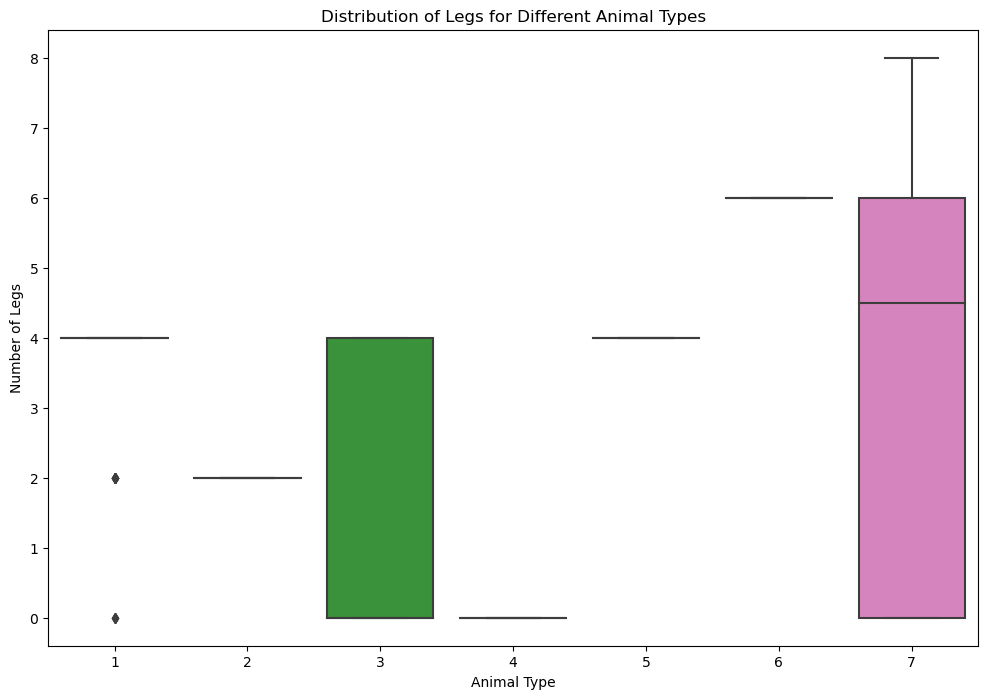

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='legs', data=data)
plt.xlabel('Animal Type')
plt.ylabel('Number of Legs')
plt.title('Distribution of Legs for Different Animal Types')
plt.show()

In [37]:
# Define input features and target variable
X = data.drop(['animal name', 'type'], axis=1)
y = data['type']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Build the KNN classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
# Make predictions on the test set
y_pred = model.predict(X_test)

C:\Users\Amit D\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
# Calculate accuracy and display confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

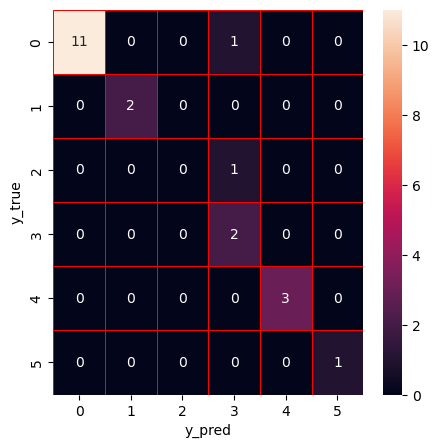

In [42]:
# confusion matrix vizualization
import matplotlib.pyplot as plt
import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(confusion_mat,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [43]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.9047619047619048
Confusion Matrix:
 [[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


# 1. The accuracy score of 0.9048 indicates that the KNN model achieved a high level of accuracy in classifying animals into categories.
# 2. The first row shows that out of 12 instances of a particular animal category, 11 were correctly classified, while 1 was misclassified as another category.
# 3. The second row indicates that out of 2 instances of another animal category, both were correctly classified.

In [19]:
# using - one hot encoder

trans1 = OneHotEncoder()

cat_columns= ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']

preprocessor = ColumnTransformer( 
                    transformers= [
                        ('Encoding', trans1, cat_columns)
                    ])

In [20]:
## Using KNN

model = KNeighborsClassifier()

In [21]:
pipe = Pipeline(steps=[('Preprocessor', preprocessor)])

In [22]:
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
y_pred = model.predict(X_test)

C:\Users\Amit D\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
# Accuracy Score

acc = accuracy_score(y_test, y_pred)
acc

0.9523809523809523

In [25]:
# Classification Report and Roc Auc Score

from sklearn.metrics import classification_report, roc_auc_score

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



C:\Users\Amit D\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit D\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit D\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# From above it is evident that as Precision, recall & f1 score is 1.00, meaning all instances predicted as class 1,2,6 & 7 were actually in class 1,2,6 & 7.
# And as Precision, recall & f1 score is 0.00, meaning none of the instances predicted as class 3 were actually in class 3 (all were misclassified).